Checking directories...
Train directory exists: True
Validation directory exists: True
Train directory contents: ['dogs', 'cats']
Validation directory contents: ['dogs', 'cats']
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

Showing sample images...


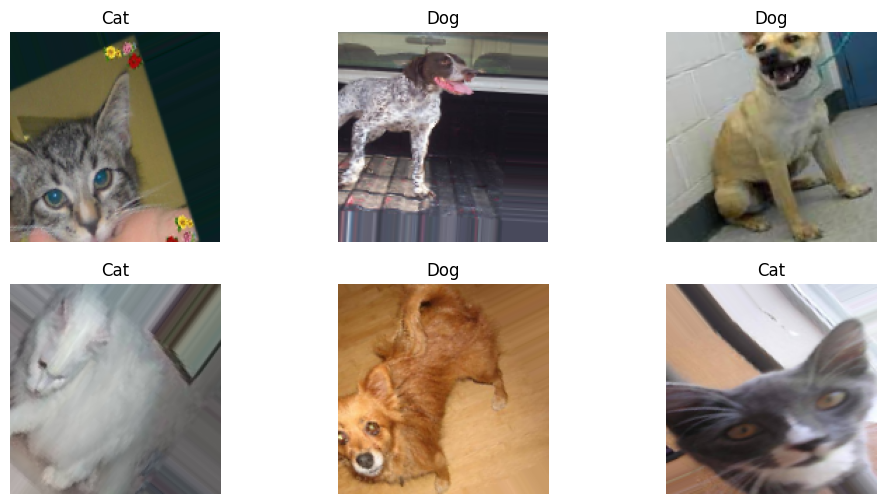


Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.5143 - loss: 0.6922 - val_accuracy: 0.4967 - val_loss: 0.6875
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4375 - loss: 0.6981 - val_accuracy: 0.5469 - val_loss: 0.6873
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 128s 8s/step - accuracy: 0.5463 - loss: 0.6904 - val_accuracy: 0.5848 - val_loss: 0.6746
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6406 - loss: 0.6762 - val_accuracy: 0.5647 - val_loss: 0.6762
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 141s 10s/step - accuracy: 0.5595 - loss: 0.6844 - val_accuracy: 0.5491 - val_loss: 0.6798
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5000 - loss: 0.6878 - val_accuracy: 0.5882 - val_loss: 0.6733
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 142s 10s/step - accuracy: 0.6011 - loss: 0.6704 - val_accuracy: 0.6105 - val_loss: 0.6510
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 994ms/step - accuracy: 0.6484 - loss: 0.6254 - v

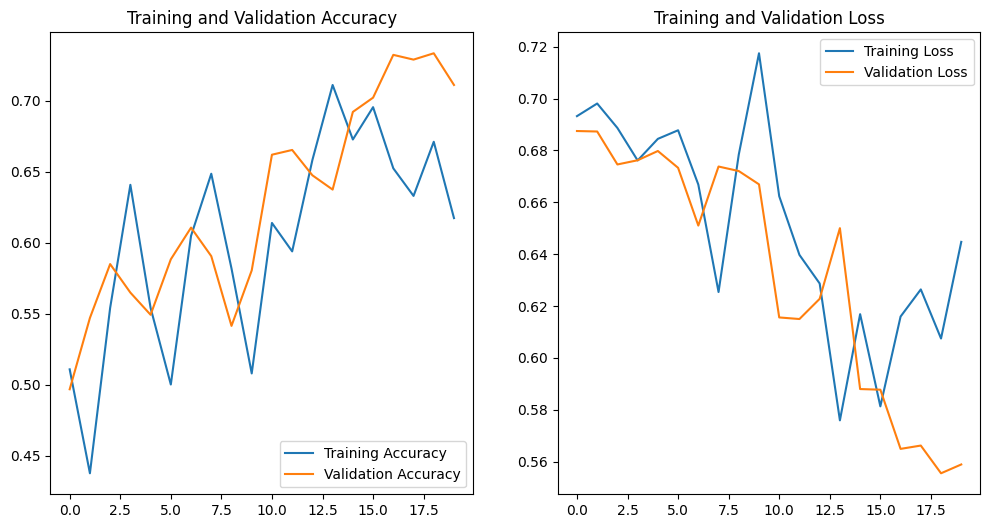


Final validation accuracy: 71.09%
🎉 Congratulations! You passed the challenge! 🎉
🌟 Extra credit achieved! You got 70%+ accuracy! 🌟


In [3]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import zipfile

# Download and extract the dataset properly
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Download the zip file
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=False)

# Extract to a specific directory
extract_path = '/tmp/cats_and_dogs'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Set correct directories
PATH = os.path.join(extract_path, 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

# Verify directories exist
print("Checking directories...")
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Validation directory exists: {os.path.exists(validation_dir)}")

# List contents to verify
if os.path.exists(train_dir):
    print("Train directory contents:", os.listdir(train_dir))
if os.path.exists(validation_dir):
    print("Validation directory contents:", os.listdir(validation_dir))

# Parameters
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Create image generators with data augmentation
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_image_generator = ImageDataGenerator(rescale=1./255)

# Create data generators
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# Show some sample images
print("\nShowing sample images...")
sample_images, sample_labels = next(train_data_gen)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title('Dog' if sample_labels[i] == 1 else 'Cat')
    plt.axis('off')
plt.show()

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show model summary
print("\nModel Summary:")
model.summary()

# Train the model
print("\nStarting training...")
total_train = 2000
total_val = 1000

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    verbose=1
)

# Plot training results
print("\nPlotting results...")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Check if we passed the challenge
final_accuracy = history.history['val_accuracy'][-1]
print(f"\nFinal validation accuracy: {final_accuracy*100:.2f}%")

if final_accuracy >= 0.63:
    print("🎉 Congratulations! You passed the challenge! 🎉")
    if final_accuracy >= 0.70:
        print("🌟 Extra credit achieved! You got 70%+ accuracy! 🌟")
else:
    print("Keep trying! You can increase epochs or adjust the model.")